> ## Aplicação 02 - Classificação de Frutas (Laranja ou Maçã?)

O dataset utilizado está presente em: https://github.com/SnehaShukla937/SupportVectorMachine

#### Etapa 01 - Importando Bibliotecas e Preparando o Dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

#leitura do csv
dataset = './datasets/apples_and_oranges.csv'
data = pd.read_csv(dataset)

In [2]:
data.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [3]:
# Divisão do dataset e criando os vetores para o SVM
training_set, test_set = train_test_split(data, test_size=0.2,random_state=1)
x_train = training_set.iloc[:,0:2].values #dados de treino
y_train = training_set.iloc[:,2].values # classe de treino
x_test = test_set.iloc[:,0:2].values #dados de teste
y_test = test_set.iloc[:,2].values #classe de teste

#### Etapa 02 - Treinando o modelo

In [4]:
classificador = SVC(kernel='rbf', random_state=1,C=1,gamma ='auto')
classificador.fit(x_train, y_train)

SVC(C=1, gamma='auto', random_state=1)

#### Etapa 03 - Analisando as métricas do classificador

<AxesSubplot: >

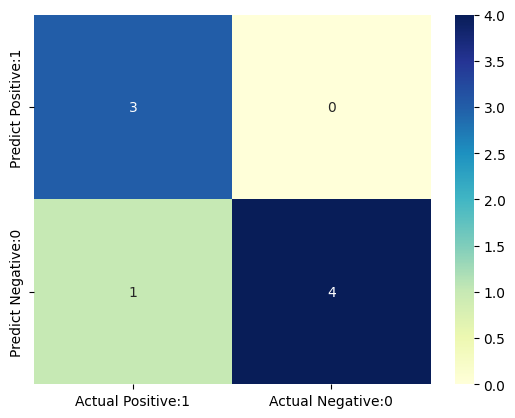

In [5]:
import seaborn as sns

y_pred = classificador.predict(x_test)
matriz_confusao = confusion_matrix(y_test,y_pred)

# Graficos da matriz de confusão usando seaborn

cm_matrix = pd.DataFrame(data=matriz_confusao, 
                         columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [6]:
acuracia = float(matriz_confusao.diagonal().sum())/len(y_test)
print('A acurácia do modelo é: ', acuracia*100,'%')

A acurácia do modelo é:  87.5 %


#### Etapa 06 - Visualizando o hiperplano

In [7]:
import matplotlib.pyplot as plt
import numpy as np

lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
classificador = SVC(kernel='rbf', random_state=1,C=1,gamma ='auto')
classificador.fit(x_train, y_train)

SVC(C=1, gamma='auto', random_state=1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


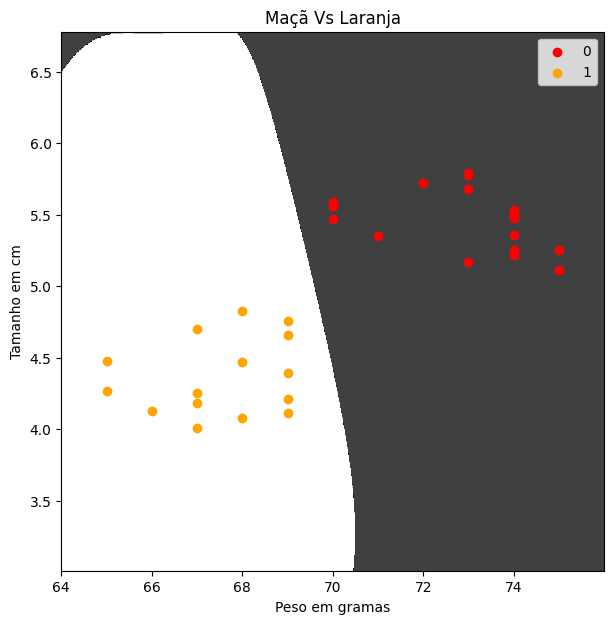

In [8]:
from matplotlib.colors import ListedColormap

# visualizing the training data after model fitting
plt.figure(figsize=(7,7))
x_set,y_set = x_train,y_train
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop = x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,1].min()-1,stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2,classificador.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha = 0.75,cmap =
             ListedColormap(('black','white')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],
                x_set[y_set == j,1],
                c =ListedColormap(('red','orange'))(i),
                label = j)

plt.title('Maçã Vs Laranja')
plt.xlabel('Peso em gramas')
plt.ylabel('Tamanho em cm')
plt.legend()
plt.show()

#### Etapa 05 - Fazendo Predições

In [13]:
def analise(instancia):
    return (classificador.predict(instancia))

peso = float(input("Digite o peso: "))
tamanho = float(input("Digite o tamanho: "))
instancia = [[peso,tamanho]]

print("{}".format(analise(instancia)))

Digite o peso:  45
Digite o tamanho:  4.5


[0]
